## Data Preparation for Machine Learning example

Data preparation is a vital step in the machine learning pipeline. Just as visualization is necessary to understand the relationships in data, proper preparation or data munging is required to ensure machine learning models work optimally.

The process of data preparation is highly interactive and iterative. A typical process includes at least the following steps

1. Visualization of the dataset to understand the relationships and identify possible problems with the data.
2. Data cleaning and transformation to address the problems identified. It many cases, step 1 is then repeated to verify that the cleaning and transformation had the desired effect.
3. Construction and evaluation of a machine learning models. Visualization of the results will often lead to understanding of further data preparation that is required; going back to step 1.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
#Prints the first 20 rows of the dataset

auto_prices = pd.read_csv('Automobile price data _Raw_.csv')
auto_prices.head(20)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Python will not correctly recognize character strings containing '-'. Rather, such a name will be recognized as two character strings. The same problem will occur with column values containing many special characters including, '-', ',', '*', '/', '|', '>', '<', '@', '!' etc. If such characters appear in column names of values, they must be replaced with another character.

In [3]:
auto_prices.columns = [str.replace('-', '_') for str in auto_prices.columns]
auto_prices.shape

(205, 26)

### Treat missing values
 __Identify the columns with missing values__

In [4]:
(auto_prices.astype(np.object) == '?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [5]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

__Price is shown to be an object type column, so is bore, stroke, how many missing values are in each of these object type columns?__

In [6]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x == '?']
        print(col + ' ' + str(sum(count)))

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [7]:
## Drop column with too many missing values
auto_prices.drop('normalized_losses', axis = 1, inplace = True)
## Remove rows with missing values, accounting for mising values coded as '?'
cols = ['price', 'bore', 'stroke',
          'horsepower', 'peak_rpm']
for column in cols:
    auto_prices.loc[auto_prices[column] == '?', column] = np.nan
auto_prices.dropna(axis = 0, inplace = True)
auto_prices.shape

(195, 25)

### Transform column data type

In [8]:
for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])
auto_prices[cols].dtypes

price           int64
bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
dtype: object

### Transforming a numerical variable
__In this case our label is Price which we are trying to predict and we will see the distribution of the data__

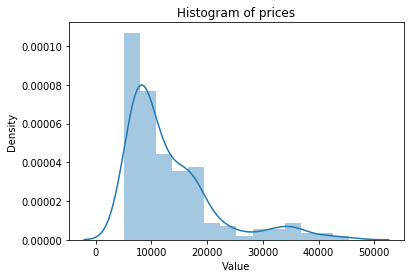

In [9]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(auto_prices['price'], 'prices')

__Notice the Skew towards the low priced cars density?__

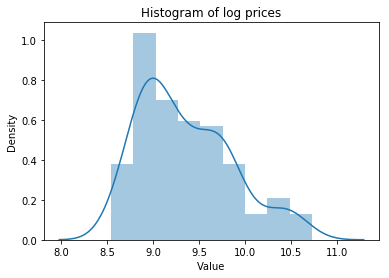

In [11]:
#Transform the data 

auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'], 'log prices')